In [2]:
import os
import mlflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import torch

In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data = pd.read_csv('titanic_clear.csv')
data.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
26,0,1,1,28,1,0,82,1
694,1,1,0,47,1,1,53,0
362,0,1,1,30,0,0,28,1
168,1,2,0,35,0,0,21,0
430,1,2,1,32,1,0,26,0


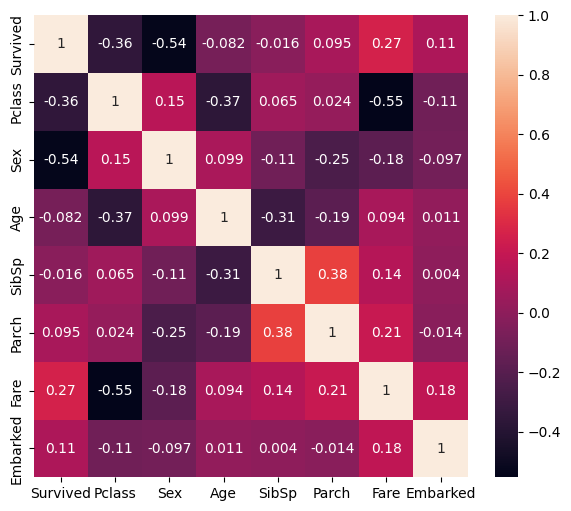

In [5]:
fig=plt.figure(figsize=(7,6))
sns.heatmap(data.corr(), annot = True) 
plt.show()

In [7]:
# стандартизация данных для обучения 
# data.iloc[:,1:] = (data.iloc[:,1:]-data.iloc[:,1:].mean())/data.iloc[:,1:].std()
# нормализация данных для обучения 
data.iloc[:,1:] = (data.iloc[:,1:]-data.iloc[:,1:].min())/(data.iloc[:,1:].max()-data.iloc[:,1:].min())
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1.0,1.0,0.2750,0.2,0.0,0.013672,0.0
1,1,0.0,0.0,0.4750,0.2,0.0,0.138672,0.5
2,1,1.0,0.0,0.3250,0.0,0.0,0.015625,0.0
3,1,0.0,0.0,0.4375,0.2,0.0,0.103516,0.0
4,0,1.0,1.0,0.4375,0.0,0.0,0.015625,0.0


In [10]:
train, test = train_test_split(data, test_size=0.2)

In [11]:
array_tr = train.values
array_test = test.values
array_tr

array([[1.        , 0.        , 0.        , ..., 0.        , 0.16210938,
        0.        ],
       [0.        , 0.5       , 1.        , ..., 0.        , 0.14453125,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.16666667, 0.18359375,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.09765625,
        0.5       ],
       [0.        , 1.        , 1.        , ..., 0.        , 0.015625  ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.16666667, 0.078125  ,
        0.        ]], shape=(569, 8))

In [14]:
X = array_tr[:,1:] # факторные признаки, т.е. параметры объекта
Y = array_tr[:,0] # результативные признак, т.е. сам объект
X_test = array_test[:,1:] # факторные признаки, т.е. параметры объекта
Y_test = array_test[:,0] # результативные признак, т.е. сам объект
# это обучение с учителем х - это данные, y - это ответ

mlflow server --backend-store-uri "file:///D:/CV_vision/MLflow/ML_flow_server/data_local" --default-artifact-root "file:///D:/CV_vision/MLflow/ML_flow_server/artefacts" --host localhost --port 5000

In [15]:
# Укажем юзера который делает эксперименты
os.environ['USER'] = 'Seregin'

In [17]:
# Инициализация MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Titanic_lossess")

<Experiment: artifact_location='file:///D:/CV_vision/MLflow/ML_flow_server/artefacts/289239790406553322', creation_time=1758813099177, experiment_id='289239790406553322', last_update_time=1758813099177, lifecycle_stage='active', name='Titanic_lossess', tags={}>

In [23]:
with mlflow.start_run(run_name='Titanic_lossess') as run:

    algs = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    # mlflow.log_param("решатель", f'{i}')
    for i in algs:
        print(i)
        
        model=LogisticRegression(solver = i)
        # print(i)
        results = model.fit(X,Y)
        preds = model.predict(X_test)
        acc = accuracy_score(Y_test, preds)
        conf_matrix = confusion_matrix(Y_test, preds)
        mlflow.log_metric("test_acc", acc)
        mlflow.log_metric("True_P", conf_matrix[0][0])
        mlflow.log_metric("True_N", conf_matrix[-1][-1])
        mlflow.log_metric("False_P", conf_matrix[0][-1])
        mlflow.log_metric("False_N", conf_matrix[-1][0])
mlflow.end_run()

lbfgs
liblinear
newton-cg
newton-cholesky
sag
saga
🏃 View run Titanic_lossess at: http://localhost:5000/#/experiments/289239790406553322/runs/0af5004b9ddf489bb8a68a5e1524001e
🧪 View experiment at: http://localhost:5000/#/experiments/289239790406553322


In [ ]:
# algs = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# for i in algs:
#     print(i)

lbfgs
liblinear
newton-cg
newton-cholesky
sag
saga


In [ ]:
# model=LogisticRegression(solver = 'liblinear')

In [ ]:
# results = model.fit(X,Y)

In [ ]:
# preds = model.predict(X)
# preds

array([0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# accuracy_score(Y, preds)

0.7996485061511424

In [ ]:
# confusion_matrix(Y, preds)

array([[285,  47],
       [ 67, 170]])

In [ ]:
# # Укажем юзера который делает эксперименты
# os.environ['USER'] = 'Seregin'

In [ ]:
# train, test = train_test_split(data, test_size=0.2)

# # Инициализация MLflow
# mlflow.set_tracking_uri("http://localhost:5000")
# mlflow.set_experiment("Titanic_lossess")

2025/09/25 18:11:39 INFO mlflow.tracking.fluent: Experiment with name 'Titanic_lossess' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///D:/CV_vision/MLflow/ML_flow_server/artefacts/289239790406553322', creation_time=1758813099177, experiment_id='289239790406553322', last_update_time=1758813099177, lifecycle_stage='active', name='Titanic_lossess', tags={}>